### Comparing tweets and hate crime

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


### Hate crime

In [53]:
crime = pd.read_csv('hate_crime 15-21.csv')

In [54]:
crime

,Date,Non-aggravated offences,Aggravated offences,Total offences
0,04/2015,100,100,200.000000
1,05/2015,107,100,207.200475
2,06/2015,108,103,210.929374
3,07/2015,113,111,223.853078
4,08/2015,108,102,209.854361
...,...,...,...,...
67,11/2020,136,134,269.865227
68,12/2020,133,129,262.480962
69,01/2021,122,116,238.321758
70,02/2021,119,118,236.467892


In [55]:
crime['Date'] = pd.to_datetime(crime['Date'], format='%m/%Y')

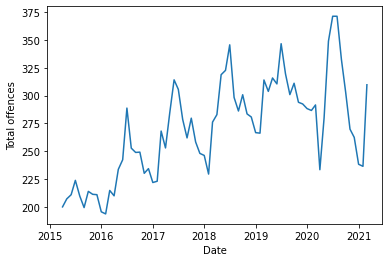

In [57]:
sns.lineplot(data=crime, x="Date", y="Total offences");

### Hate crime with images on Plotly

In [36]:
from PIL import Image

In [90]:
im_BLM = Image.open('BLM_2020.png')

In [152]:
# Create figure
fig = go.Figure()

# Add hate crime
fig.add_trace(go.Scatter(x=crime['Date'], y=crime['Total offences'], name='Hate Crime'))

# Add text
fig.add_annotation(
        x='2017-05-22',
        y=300,
        xref="x",
        yref="y",
        text="Manchester Arena attacks",showarrow=True, arrowhead=3,arrowcolor="red",
        font=dict(
            size=14,
            color="black"
            ),
    ax=20,
        ay=-30,
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8)

fig.add_annotation(
        x='2016-06-23',
        y=290,
        xref="x",
        yref="y",
        text="EU Referendum",showarrow=True, arrowhead=3,arrowcolor="red",
        font=dict(
            size=14,
            color="black"
            ),
    ax=20,
        ay=-30,
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8)

fig.add_annotation(
        x='2018-08-06',
        y=330,
        xref="x",
        yref="y",
        text="Muslim women as 'bank robbers' article",showarrow=True, arrowhead=3,arrowcolor="red",
        font=dict(
            size=14,
            color="black"
            ),
    ax=20,
        ay=-30,
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8)
    
fig.add_annotation(
        x='2020-05-28',
        y=325,
        xref="x",
        yref="y",
        text="Black Lives Matter protests",showarrow=True, arrowhead=3,arrowcolor="red",
        font=dict(
            size=14,
            color="black"
            ),
    ax=20,
        ay=-30,
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8

)


fig.add_annotation(
        x='2019-05-9',
        y=310,
        xref="x",
        yref="y",
        text="Royal baby as 'chimpanzee'", showarrow=True, arrowhead=1,arrowsize=1,
        arrowwidth=1,
        font=dict(
            size=14,
            color="black"
            ),
        ax=20,
        ay=-30,
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8, arrowcolor="red",)

fig.update_layout(
    title={
        'text': "Racially or Religiously Aggravated Offences, England and Wales",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title="Year", yaxis_title="Offences")



fig.show()

### Tweets on immigration

In [96]:
tweets = pd.read_csv('20k_2008.csv')

In [97]:
tweets.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0


In [98]:
tweets['Date'] = tweets['Datetime'].str[:11]

In [99]:
tweets

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Date
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,2022-06-08
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,2022-06-08
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,2022-06-08
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,2022-06-07
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,2022-06-05
...,...,...,...,...,...,...,...
21436,21434,2008-08-19 08:51:25+00:00,891944603,One man dead and three critical in horror bus ...,MailOnline,0.0,2008-08-19
21437,21435,2008-08-18 20:22:00+00:00,891418251,One killed and up to 40 injured after migrant ...,MailOnline,0.0,2008-08-18
21438,21436,2008-08-14 12:52:03+00:00,887337505,Gary Glitter to be deported back to Britain af...,MailOnline,0.0,2008-08-14
21439,21437,2008-08-10 22:20:40+00:00,883577335,Russia tanks &#039;turned back&#039; after try...,MailOnline,0.0,2008-08-10


In [106]:
tweets['Date'] = pd.to_datetime(tweets['Date'], infer_datetime_format=True)

In [105]:
tweets.drop([7846,21396],inplace=True)

KeyError: '[7846, 21396] not found in axis'

In [107]:
tweets[tweets['Date'].str.contains('MailOnline')]

AttributeError: Can only use .str accessor with string values!

In [108]:
tweets.dtypes

Unnamed: 0            object
Datetime              object
Tweet Id               int64
Text                  object
Username              object
Like Count           float64
Date          datetime64[ns]
dtype: object

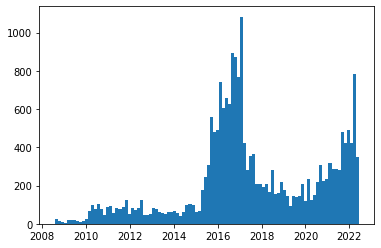

In [109]:
plt.hist(tweets['Date'],bins=100);

In [50]:
mask1 = tweets['Date'].dt.year> int(2014) 
mask2 =  tweets['Date'].dt.year< int(2021)
short_tweets = tweets[mask1]
short_tweets = short_tweets[mask2]

/var/folders/ck/xg3scjhn503b00cjf3vysm3h0000gn/T/ipykernel_5568/2187115690.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  short_tweets = short_tweets[mask2]


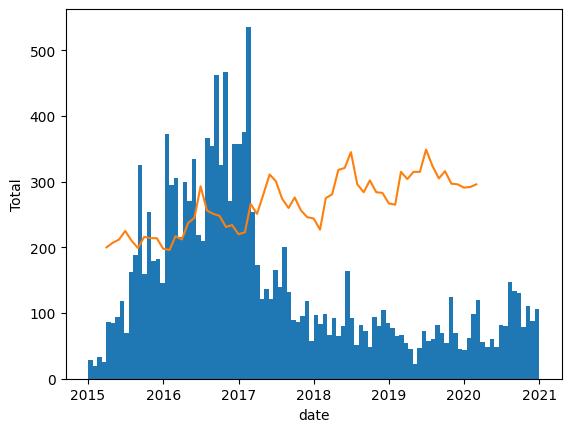

In [51]:
plt.hist(short_tweets['Date'],bins=100)
sns.lineplot(data=crime, x="date", y="Total");